### Using Keras to build and train a neural network that analyzes text for sentiment

The IMDB dataset contains 50,000 movie reviews that have been individually scored as positive (1) or negative (0). The dataset is divided into 25,000 reviews for training and 25,000 reviews for testing. The sentiment that's expressed in these reviews is the basis for which the neural network will analyze text presented to it and score it for sentiment.

In [1]:
#import dataset
from keras.datasets import imdb
top_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=top_words)

Using TensorFlow backend.


This code loads the IMDB dataset that's included with Keras and creates a dictionary mapping the words in all 50,000 reviews to integers indicating the words' relative frequency of occurrence. Each word is assigned a unique integer. The most common word is assigned the number 1, the second most common word is assigned the number 2, and so on. load_data also returns a pair of tuples containing the movie reviews (in this example, x_train and x_test) and the 1s and 0s classifying those reviews as positive and negative (y_train and y_test).

In [2]:
#get mapping of words used in the dataset for inspection
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [3]:
# First review in the test dataset represented in the form of numbers.
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Each review in the dataset is encoded as a collection of integers rather than words. It is possible to reverse-encode a review so we can see the original text that comprised it. The following statements execute to show the first review in x_train in textual format:

In [4]:
word_dict = imdb.get_word_index()
word_dict = { key:(value + 3) for key, value in word_dict.items() }
word_dict[''] = 0  # Padding
word_dict['>'] = 1 # Start
word_dict['?'] = 2 # Unknown word
reverse_word_dict = { value:key for key, value in word_dict.items() }
print(' '.join(reverse_word_dict[id] for id in x_train[0]))

> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In the output, ">" marks the beginning of the review, while "?" marks words that aren't among the most common 10,000 words in the dataset. These "unknown" words are represented by 2s in the list of integers representing a review.

Keras includes a function that takes a list of lists as input and converts the inner lists to a specified length by truncating them if necessary or padding them with 0s. The following code forces all the lists representing movie reviews in x_train and x_test to a length of 500 integers.

In [5]:
from keras.preprocessing import sequence
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_review_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_review_length)

Creating a neural network with Keras.

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


The model first instantiates a Sequential object representing a "sequential" model — one that is composed of an end-to-end stack of layers in which the output from one layer provides input to the next.

The next several statements add layers to the model. First is an embedding layer, which is crucial to neural networks that process words. The embedding layer essentially maps many-dimensional arrays containing integer word indexes into floating-point arrays containing fewer dimensions. It also allows words with similar meanings to be treated alike.

The next three layers added to the model are dense layers, also known as fully connected layers. These are the traditional layers that are common in neural networks. Each layer contains n nodes or neurons, and each neuron receives input from every neuron in the previous layer, hence the term "fully connected." It is these layers that permit a neural network to "learn" from input data by iteratively guessing at the output, checking the results, and fine-tuning the connections to produce better results. 

The first two dense layers in this network contain 16 neurons each. This number was arbitrarily chosen; one might be able to improve the accuracy of the model by experimenting with different sizes. The final dense layer contains just one neuron because the ultimate goal of the network is to predict one output — namely, a sentiment score from 0.0 to 1.0.

The call to the compile function "compiles" the model by specifying important parameters such as which optimizer to use and what metrics to use to judge the accuracy of the model in each training step. Training doesn't begin the model's fit function is called.

In [7]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 316us/step - loss: 0.5655 - acc: 0.6587 - val_loss: 0.3065 - val_acc: 0.8688
Epoch 2/5
25000/25000 [==============================] - 7s 292us/step - loss: 0.2097 - acc: 0.9188 - val_loss: 0.2789 - val_acc: 0.8823
Epoch 3/5
25000/25000 [==============================] - 8s 328us/step - loss: 0.0740 - acc: 0.9792 - val_loss: 0.3433 - val_acc: 0.8756
Epoch 4/5
25000/25000 [==============================] - 8s 324us/step - loss: 0.0184 - acc: 0.9968 - val_loss: 0.4057 - val_acc: 0.8724
Epoch 5/5
25000/25000 [==============================] - 8s 328us/step - loss: 0.0046 - acc: 0.9993 - val_loss: 0.4619 - val_acc: 0.8714


[]

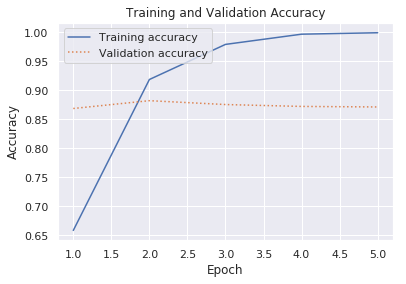

In [8]:
# Visualize the model performance using the following plot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
acc = hist.history['acc']
val = hist.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.plot()

Given that the gap between training and validation loss begins increasing in the third epoch, therefore the epoch should be set to 2 to achieve maximum accuracy.

Finally, calling the model's evaluate method to determine how accurately the model is able to quantify the sentiment expressed in text based on the test data in x_test (reviews) and y_test (0s and 1s, or "labels," indicating which reviews are positive and which are negative).

In [9]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 87.14%
